In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.svm import LinearSVR

# Common imports
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from tensorflow import keras
from keras import layers



# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
games = 'train.csv'
gamesdf = pd.read_csv(games, header=0)

gamesdf['group_num'] = gamesdf.groupby('game_id').cumcount() + 1
pivoted_df = gamesdf.pivot(index='game_id', columns='group_num', values=['nickname', 'score', 'rating'])
pivoted_df.columns = [f'{col[0]}{col[1]}' for col in pivoted_df.columns]
pivoted_df['rating1'] = pd.to_numeric(pivoted_df['rating1'])
pivoted_df['rating2'] = pd.to_numeric(pivoted_df['rating2'])
pivoted_df['score1'] = pd.to_numeric(pivoted_df['score1'])
pivoted_df['score2'] = pd.to_numeric(pivoted_df['score2'])


In [5]:
data = pivoted_df

y = data.iloc[:, -1]
X = data.drop(data.columns[[-1, 0, 1]], axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_indices = X.index.values
y_indices = y.index.values

print(X)
print(y)

         score1  score2  rating1
game_id                         
1           335     429     1637
3           440     318     1811
4           119     478     1473
5           325     427     1500
6           378     427     2029
...         ...     ...      ...
72767       340     414     1395
72770       590      97     2237
72771       390     393     1500
72772       442     388     1674
72773       383     346     2075

[50410 rows x 3 columns]
game_id
1        1500
3        2071
4        1936
5        1844
6        2143
         ... 
72767    1952
72770    1332
72771    1614
72772    1364
72773    2302
Name: rating2, Length: 50410, dtype: int64


In [14]:

# Define your neural network model
# model = keras.models.Sequential([
#     keras.layers.Dense(30, activation="relu", input_shape=(X_train.shape[1],)),
#     keras.layers.Dense(20, activation="relu",),
#     keras.layers.Dense(1, activation="sigmoid")
# ])
from keras.callbacks import EarlyStopping
model = keras.models.Sequential([
    keras.layers.Dense(8, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(4, activation="relu"),

    keras.layers.Dense(1)
])
# Compile the model
model.compile(loss="mean_squared_error", optimizer='adam')

# Create lists to store the training history
mse_train, mse_valid = [], []

# Train the model on your training data
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=200, validation_split=0.5, callbacks=[early_stopping])

# Extract training and validation MSE for each epoch
for epoch in history.epoch:
    mse_train.append(history.history['loss'][epoch])
    mse_valid.append(history.history['val_loss'][epoch])

# Evaluate the model on the test data
mse_test = model.evaluate(X_test, y_test)

# Make predictions on a few samples
X_new = X_test[:3]
y_pred = model.predict(X_new)

print("Mean Squared Error on Test Data:", mse_test)

Epoch 1/200


ValueError: in user code:

    File "C:\Users\Nick_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Nick_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Nick_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Nick_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Nick_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Nick_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "C:\Users\Nick_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "C:\Users\Nick_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "C:\Users\Nick_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\losses.py", line 2929, in get
        return deserialize(identifier, use_legacy_format=use_legacy_format)
    File "C:\Users\Nick_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\losses.py", line 2876, in deserialize
        return legacy_serialization.deserialize_keras_object(
    File "C:\Users\Nick_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\saving\legacy\serialization.py", line 537, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'mean_square_error'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


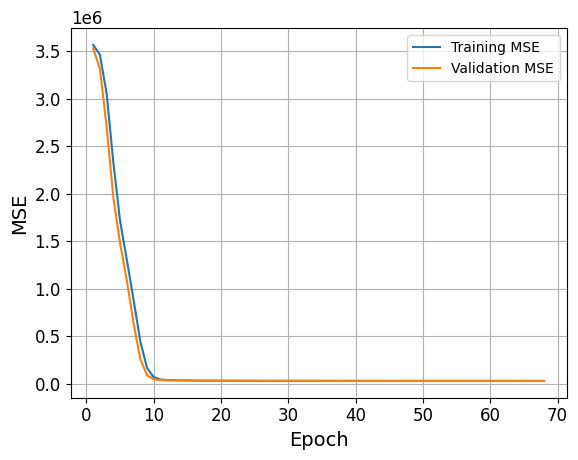

In [9]:
import matplotlib.pyplot as plt

# Create a plot of the training progress
plt.plot(range(1, len(mse_train) + 1), mse_train, label='Training MSE')
plt.plot(range(1, len(mse_valid) + 1), mse_valid, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()